# Wafer map notebook
This notebook maps out wafer thickness maps from ellipsometry data.

## Import libraries

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.interpolate import griddata

## Import data

In [6]:
data = pd.read_excel('first_dataset.xlsx')

## Define grid parameters

In [71]:
# target grid to interpolate to
x = data.X.values
y = data.Y.values
z = data.A1212.values
print(type(x))
xi = yi = np.arange(-4.1,4.1,0.01)
xi,yi = np.meshgrid(xi,yi)

<class 'numpy.ndarray'>


## Interpolate

In [72]:
zi = griddata((x,y),z,(xi,yi),method='linear')

## Plot

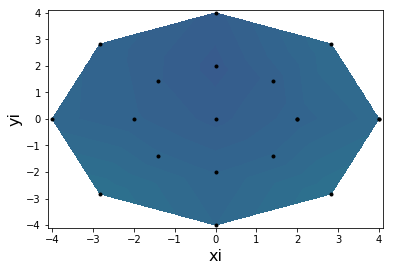

In [75]:
# plot
fig = plt.figure()
ax = fig.add_subplot(111)
plt.contourf(xi,yi,zi,vmin=m, vmax=500)
plt.plot(data.X,data.Y,'k.')
plt.xlabel('xi',fontsize=16)
plt.ylabel('yi',fontsize=16)
plt.show()
plt.savefig('interpolated.png',dpi=100)
plt.close(fig)


In [76]:
max(data)

'Y'

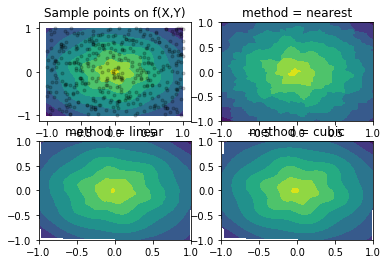

In [36]:
import numpy as np
from scipy.interpolate import griddata
import matplotlib.pyplot as plt

x = np.linspace(-1,1,100)
y =  np.linspace(-1,1,100)
X, Y = np.meshgrid(x,y)

def f(x, y):
    s = np.hypot(x, y)
    phi = np.arctan2(y, x)
    tau = s + s*(1-s)/5 * np.sin(6*phi) 
    return 5*(1-tau) + tau

T = f(X, Y)
# Choose npts random point from the discrete domain of our model function
npts = 400
px, py = np.random.choice(x, npts), np.random.choice(y, npts)

fig, ax = plt.subplots(nrows=2, ncols=2)
# Plot the model function and the randomly selected sample points
ax[0,0].contourf(X, Y, T)
ax[0,0].scatter(px, py, c='k', alpha=0.2, marker='.')
ax[0,0].set_title('Sample points on f(X,Y)')

# Interpolate using three different methods and plot
for i, method in enumerate(('nearest', 'linear', 'cubic')):
    Ti = griddata((px, py), f(px,py), (X, Y), method=method)
    r, c = (i+1) // 2, (i+1) % 2
    ax[r,c].contourf(X, Y, Ti)
    ax[r,c].set_title('method = {}'.format(method))

plt.show()

In [37]:
type(x)

numpy.ndarray